<h1>Fashion-Mnist</h1>
<p>Fashion Mnist is an Mnist like dataset using images of clothing instead of hand written digit. Each photo is 28*28 grayscale, with 10 different classes</p>

<p>Our Data Contain 70,000 images 60,000 for train and 10,000 for test</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Fashion Class Classification/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Fashion Class Classification/fashion-mnist_test.csv')

In [3]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df = np.array(train_df, dtype='float32')
test_df = np.array(test_df, dtype= 'float32')

<h4>Converting my data into 0-1 form</h4>

In [5]:
X_train = train_df[:, 1:] / 255
Y_train = train_df[:, 0]

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X_test = test_df[:, 1:] / 255
Y_test = test_df[:, 0]

In [8]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

<h4>Split my train data into train and validate data</h4>

In [9]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size= 0.2 , random_state = 12345) 

<h4>Let me show you how we use the data to make image</h4>

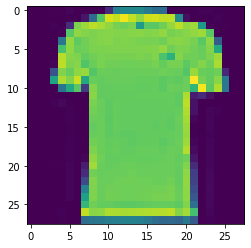

In [10]:
image = X_train[67, :].reshape((28,28))
plt.imshow(image)
plt.show()

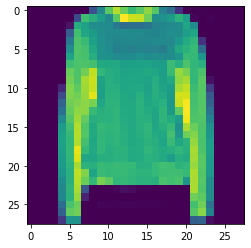

In [11]:
image = X_train[944, :].reshape((28,28))
plt.imshow(image)
plt.show()

<h2>Lets Make our CNN Model</h2>

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

<h3>1. Define the Model</h3>
<h3>2. Compile the Model</h3>
<h3>3. Fit the Model</h3>

In [20]:
X_train.shape[0]

48000

In [30]:
im_rows = 28
im_cols = 28
batch_size = 512
img_shape = (im_rows, im_cols, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *img_shape)

In [23]:
print('X_train Shape : {}'.format(X_train.shape))
print('X_test Shape : {}'.format(X_test.shape))
print('X_validate Shape : {}'.format(X_validate.shape))

X_train Shape : (48000, 28, 28, 1)
X_test Shape : (10000, 28, 28, 1)
X_validate Shape : (12000, 28, 28, 1)


In [25]:
cnn_model = Sequential([
                        Conv2D(filters= 32, kernel_size= 3, activation= 'relu', input_shape= img_shape),
                        MaxPool2D(pool_size= 2),
                        Dropout(0.2),
                        Flatten(),
                        Dense(32, activation= 'relu'),
                        Dense(10, activation= 'softmax'),                        
])

In [27]:
Tensorboard = TensorBoard(
    log_dir = r'logs\{}'.format('cnn_model'),
    write_graph = True,
    write_grads = True,
    histogram_freq = 1,
    write_images = True
)

In [29]:
cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(lr= 0.001),
    metrics = ['accuracy']
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
cnn_model.fit(X_train, Y_train, batch_size= batch_size , epochs= 10, verbose= 1, validation_data= (X_validate, Y_validate))

Epoch 1/10
94/94 [==============================] - 36s 214ms/step - loss: 1.1047 - accuracy: 0.6205 - val_loss: 0.4787 - val_accuracy: 0.8282
Epoch 2/10
94/94 [==============================] - 20s 209ms/step - loss: 0.4677 - accuracy: 0.8359 - val_loss: 0.3957 - val_accuracy: 0.8599
Epoch 3/10
94/94 [==============================] - 20s 209ms/step - loss: 0.3951 - accuracy: 0.8619 - val_loss: 0.3620 - val_accuracy: 0.8741
Epoch 4/10
94/94 [==============================] - 20s 208ms/step - loss: 0.3640 - accuracy: 0.8705 - val_loss: 0.3383 - val_accuracy: 0.8806
Epoch 5/10
94/94 [==============================] - 20s 208ms/step - loss: 0.3293 - accuracy: 0.8828 - val_loss: 0.3365 - val_accuracy: 0.8810
Epoch 6/10
94/94 [==============================] - 19s 208ms/step - loss: 0.3201 - accuracy: 0.8862 - val_loss: 0.3079 - val_accuracy: 0.8924
Epoch 7/10
94/94 [==============================] - 20s 208ms/step - loss: 0.3052 - accuracy: 0.8920 - val_loss: 0.2987 - val_accuracy: 0.8927

In [33]:
callback = (Tensorboard)

In [34]:
score = cnn_model.evaluate(X_test, Y_test, verbose= 0)

In [35]:
print('test case : {}'.format(score[0]))
print('test accuracy : {}'.format(score[1]))

test case : 0.27404871582984924
test accuracy : 0.9042999744415283
